## Hysteresis and regression analysis example

Given a calibration of an instrument for an increasing and decreasing input $q_i$ [kPa] and output of the instrument $q_o$ [kPa]

In [1]:
%pylab inline
pylab.rcParams['figure.figsize'] = 10, 8 
pylab.rcParams['font.size'] = 16 

Populating the interactive namespace from numpy and matplotlib


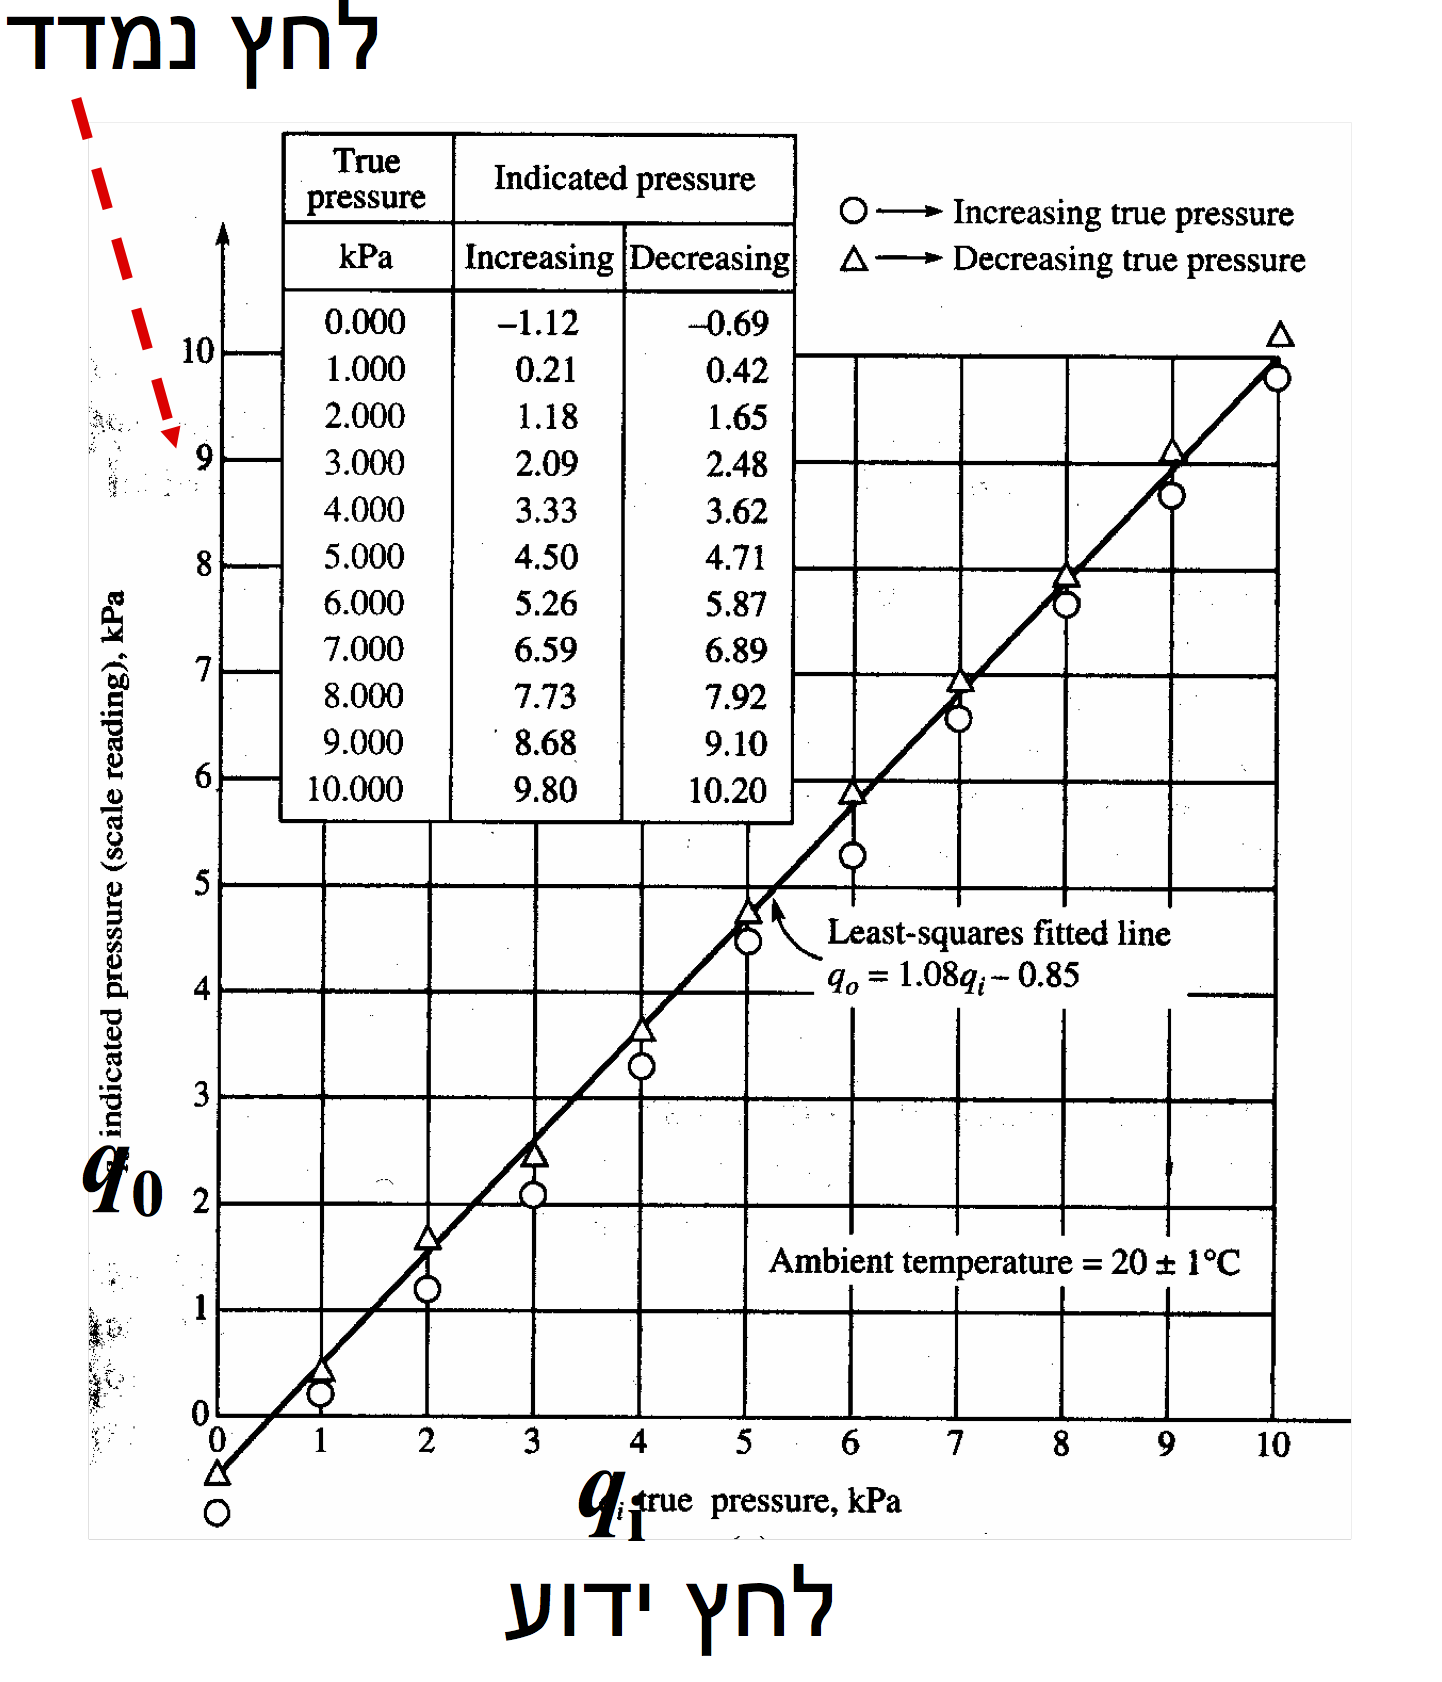

In [2]:
from IPython.core.display import Image 
Image(filename='../../img/pressure_calibration_example.png',width=400)

In [3]:
# increasing
xi = array([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0])
yi = array([-1.12, 0.21, 1.18, 2.09, 3.33, 4.50, 5.26, 6.59, 7.73, 8.68, 9.80])
# decreasing
xd = xi.copy()
yd = array([-0.69, 0.42, 1.65, 2.48, 3.62, 4.71, 5.87, 6.89, 7.92, 9.10, 10.20])

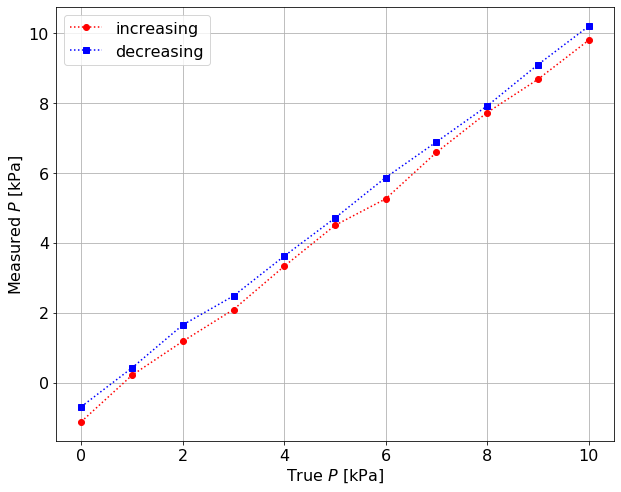

In [4]:
figure()
plot(xi,yi,'r:o',xd,yd,'b:s')
grid('on')
xlabel('True $P$ [kPa]')
ylabel('Measured $P$ [kPa]')
legend(('increasing','decreasing'))


### Estimate the hysteresis error:

$e_h = y_{up} - y_{down}$

$e_{h_{max}} = max(|e_h|)$

$e_{h_{max}}\% = 100\% \cdot \frac{e_{h_{max}}}{y_{max}-y_{min}} $

In [5]:
e_h = yi-yd 
print("e_h =", e_h,"[kPa]")

e_h = [-0.43 -0.21 -0.47 -0.39 -0.29 -0.21 -0.61 -0.3  -0.19 -0.42 -0.4 ] [kPa]


In [6]:
e_hmax = np.max(np.abs(e_h))
print("e_hmax= %3.2f %s" % (e_hmax,"[kPa]"))

e_hmax= 0.61 [kPa]


In [7]:
e_hmax_p = 100*e_hmax/(np.max(xi) - np.min(xd))
print("Relative error = %3.2f%s FSO" % (e_hmax_p,"%"))

Relative error = 6.10% FSO


## Regression analysis
Following the recipe of http://www.answermysearches.com/how-to-do-a-simple-linear-regression-in-python/124/

In [8]:
import sys
sys.path.append('../../scripts/')
from linear_regression import linreg

In [9]:
print("Increasing")
ai,bi,Ri,sxyi = linreg(xi,yi)
print(ai,bi,Ri)
print("Decreasing")
ad,bd,Rd,sxd = linreg(xd,yd)
print(ad,bd,Rd)

Increasing
Estimate: y = ax + b
N = 11
Degrees of freedom $\nu$ = 9 
a = 1.08 $\pm$ 0.011
b = -1.03 $\pm$ 0.063
R^2 = 0.999
Sxy = 0.116
y = 1.08 x + -1.03 $\pm$ 0.11V
1.0823636363636362 -1.025454545454545 0.9990647108930198
Decreasing
Estimate: y = ax + b
N = 11
Degrees of freedom $\nu$ = 9 
a = 1.08 $\pm$ 0.007
b = -0.67 $\pm$ 0.039
R^2 = 1.000
Sxy = 0.072
y = 1.08 x + -0.67 $\pm$ 0.07V
1.082272727272727 -0.668636363636363 0.9996380668857191


Estimate: y = ax + b
N = 22
Degrees of freedom $\nu$ = 20 
a = 1.08 $\pm$ 0.010
b = -0.85 $\pm$ 0.056
R^2 = 0.997
Sxy = 0.208
y = 1.08 x + -0.85 $\pm$ 0.14V


NameError: name 'hold' is not defined

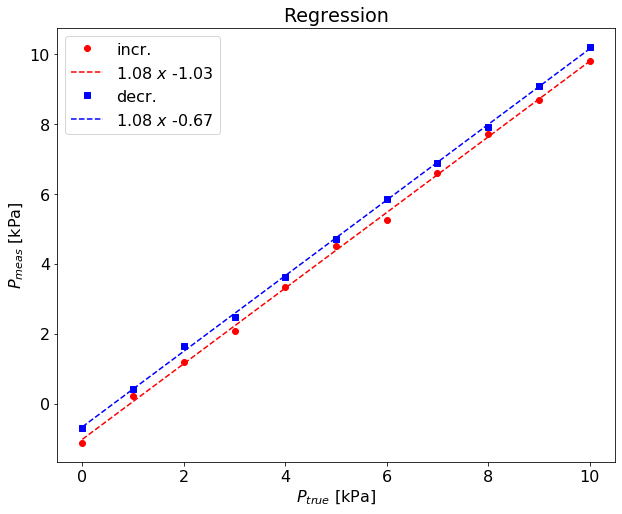

In [11]:
figure()
plot(xi,yi,'ro',xi,xi*ai+bi,'r--',xd,yd,'bs',xd,xd*ad+bd,'b--')
xlabel('$P_{true}$ [kPa]')
ylabel('$P_{meas}$ [kPa]')
title('Regression')
leg1 = '%3.2f $x$ %3.2f' % (ai,bi)
leg2 = '%3.2f $x$ %3.2f' % (ad,bd)
legend(('incr.',leg1,'decr.',leg2),loc='best')

# all all together:
a,b,R,_ = linreg(r_[xi,xd],r_[yi,yd])
hold(True)
plot(xi,xi*a+b,'k-',lw=2)
leg3 = '$q_o$ = %3.2f $q_i$ %3.2f' % (a,b)
legend(('incr.',leg1,'decr.',leg2,leg3),loc='best')

$$q_0 = m q_i + b$$

$$q_0 = 1.8 q_i - 0.85$$

$$\sigma_m^2 = \frac{N \sigma_{q_0}^2}{N\sum q_i^2 - \left(\sum q_i \right)^2}$$

$$\sigma_b^2 = \frac{\sigma_{q_0}^2\sum q_i^2}{N\sum q_i^2 - \left(\sum q_i \right)^2}$$

$$\sigma_{q_0}^2 = \frac{1}{N}\sum\left(m\,q_i + b - q_0 \right)^2 $$

$$\sigma_{q_i}^2 = \frac{1}{N}\sum\left( \frac{q_0 - b}{m} - q_i \right)^2 = \frac{\sigma_{q_0}^2}{m^2} $$


In [16]:
def regression_analysis(qi,qo):
    m,b,R,syx = linreg(qi,qo)
    # print 'qo = %3.2f qi %3.2f' % (m,b)
    N = size(qi)
    d = m*qi + b - qo # deviation
    Sqo = sum(d**2)/N
    Sqi = Sqo/m**2
    Sm = N*Sqo/(N*sum(qi**2) - sum(qi)**2)
    Sb = Sqo*sum(qi**2)/(N*sum(qi**2) - sum(qi)**2)
    return Sm,Sb,Sqi,Sqo


In [18]:
qi = r_[xi,xd]
qo = r_[yi,yd]

Sm,Sb,Sqi,Sqo = regression_analysis(qi,qo)
print('Sm, Sb, Sqi, Sqo = ')
print('%6.4f, %6.4f %6.4f %6.4f' % (Sm,Sb,Sqi,Sqo))

Estimate: y = ax + b
N = 22
Degrees of freedom $\nu$ = 20 
a = 1.08 $\pm$ 0.010
b = -0.85 $\pm$ 0.056
R^2 = 0.997
Sxy = 0.208
y = 1.08 x + -0.85 $\pm$ 0.14V
Sm, Sb, Sqi, Sqo = 
0.0002, 0.0063 0.0336 0.0394


Taking $3 \sigma$ for $99.7\%$ certainty level:

$m = 1.08 \pm 0.0006$

$b = -0.85 \pm 0.018$

When we use calibration curve for the measurement:
    
$q_i = (q_o + 0.85)/1.08 = 0.9233 q_0 + 0.785$

$S_{q_i}^2 = 0.034$

If we measured for instance 4.32 kPa, we transfer it to 4.79 kPa and write:

(4.32*0.85)/1.08 = 4.787
    
### The final result is    
$P = 4.79 \pm 0.102$ kPa (99.7\%)